 Data Analytics II
1. Implement logistic regression using Python/R to perform classification on
Social_Network_Ads.csv dataset. 2. Compute Confusion matrix to find TP, FP, TN, FN,
Accuracy, Error rate, Precision, Recall on the given dataset.

In [10]:
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import mean_squared_error, accuracy_score
import seaborn as sns

In [2]:
df = pd.read_csv('social.csv')

In [3]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [4]:
df.describe()


,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


In [5]:
df.head(10)

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
5,15728773,Male,27,58000,0
6,15598044,Female,27,84000,0
7,15694829,Female,32,150000,1
8,15600575,Male,25,33000,0
9,15727311,Female,35,65000,0


In [6]:
df.isnull().any() 

User ID            False
Gender             False
Age                False
EstimatedSalary    False
Purchased          False
dtype: bool

In [7]:
df.drop('User ID', axis=1, inplace=True)

In [8]:
gender = pd.get_dummies(df['Gender'], drop_first=True) 
df.drop('Gender', axis=1, inplace=True) 
df = pd.concat([df, gender], axis=1) 

In [9]:
df.head() 

,Age,EstimatedSalary,Purchased,Male
0,19,19000,0,True
1,35,20000,0,True
2,26,43000,0,False
3,27,57000,0,False
4,19,76000,0,True


In [11]:
# dependent and independent variables

Y = df['Purchased'] 
X = df.drop('Purchased', axis=1) 

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0) 

model = LogisticRegression()
model.fit(X_train, Y_train)

LogisticRegression()

In [12]:
history = model.predict(X_test) 

accuracy = accuracy_score(Y_test, history) 
print(f"accuracy_score: {accuracy}")

accuracy_score: 0.725


In [24]:
actual = np.array(Y_test) 
history = np.array(history) 

print(type(actual), type(history))

<class 'numpy.ndarray'> <class 'numpy.ndarray'>


<class 'numpy.ndarray'> <class 'numpy.ndarray'>


<Axes: >

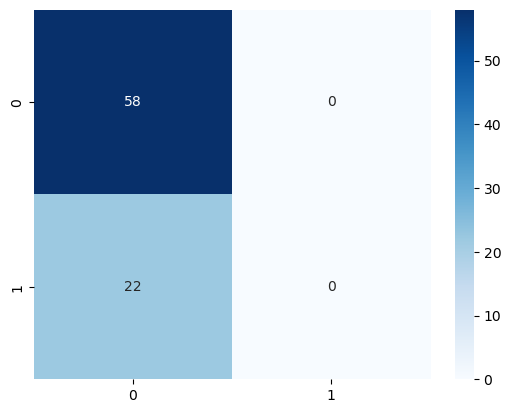

In [28]:
import numpy as np
from sklearn.metrics import confusion_matrix

# Assuming you've verified the content of `history` and it's a numpy array
actual = np.array(Y_test) 
history = np.array(history)

# Check the type to ensure it's a numpy array
print(type(actual), type(history))

# Calculate confusion matrix
cnf = confusion_matrix(actual, history)

sns.heatmap(cnf, annot=True, fmt='d', cmap='Blues')

In [29]:
TP, FP, FN, TN = cnf.ravel() 
print(f"True Positive: {TP}")
print(f"False Positive: {FP}")
print(f"False Negative: {FN}")
print(f"True Negative: {TN}")



True Positive: 58
False Positive: 0
False Negative: 22
True Negative: 0


In [30]:
error = mean_squared_error(Y_test, history) 
print(f"mean_squared_error: {error}") 


mean_squared_error: 0.275
